# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Considero que seria importante antes de seleccionar determinadas caracteristicas poder llevar a cabo una conversacion con los tasadores, ya que ellos son justamente los profesionales en esta area, para discutir que factores pueden influir y ayudar en este modelo. De todas maneras pienso que los siguientes factores pueden ser relevantes a la hora de resolver la problematica:

* Provincia, ciudad 
* Ubicación (barrio)
* Año de construcción (antiguedad)
* Tipo de vivienda (depto, casa, monoambiente)
* Superficie total y cubierta (Mts2)
* Cantidad de ambientes (Habitaciones, baños)
* Amenities
* Climatizacion
* Garage
* Seguridad
* Expensas
* Estado de conservación
* Accesibilidad de la zona 
* Servicios 
* Amoblamiento


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [2]:
plt.style.use('bmh')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
print(data.shape)

(146660, 19)


In [5]:
print(data.index)

RangeIndex(start=0, stop=146660, step=1)


In [6]:
print(data.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [7]:
print(data.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [8]:
tipos_de_propiedad = data.value_counts("property_type")
print(tipos_de_propiedad)

property_type
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
dtype: int64


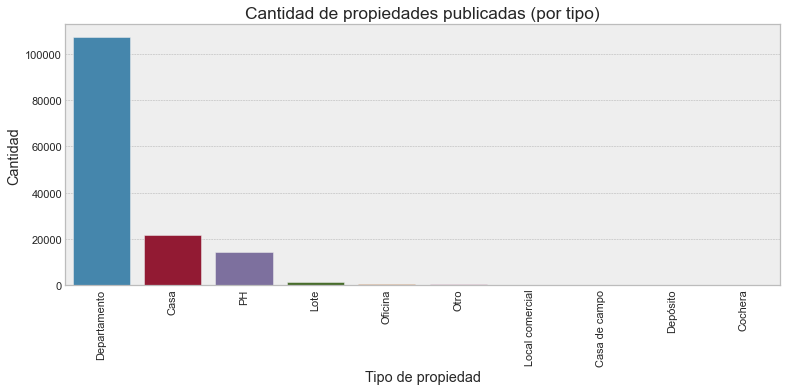

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize = (6.4*2, 4.8)); ax = sns.countplot (data = data, x = 'property_type', order = data['property_type'].value_counts().index)
plt.title('Cantidad de propiedades publicadas (por tipo)', )
plt.xticks(rotation = 90)
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad")

plt.show()
plt.savefig('Cantidad de propiedades (por tipo).png', dpi = 400)

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [10]:
data['l2'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [11]:
data['l3'].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

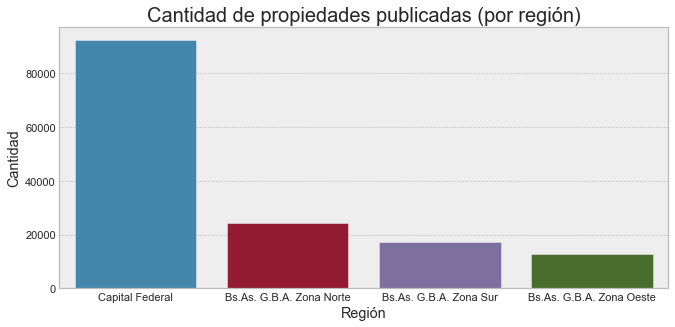

In [12]:
plt.figure(figsize = (6*4,4.8))
plt.subplot(1,2,1)
ax = sns.countplot(data = data, x = 'l2', order = data['l2'].value_counts().index)
plt.title('Cantidad de propiedades publicadas (por región)', fontsize = 20)

plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.show()

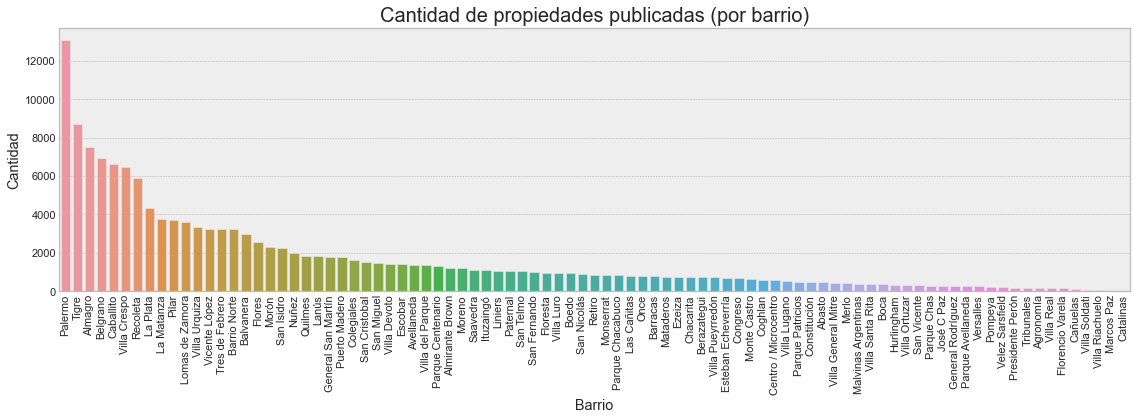

In [13]:
plt.figure(figsize = (12.4*2.5,6))
plt.subplot(1,2,2)
sns.countplot(data = data, x = 'l3', order = data['l3'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Cantidad de propiedades publicadas (por barrio)', fontsize = 20)

plt.ylabel('Cantidad')
plt.xlabel('Barrio')
plt.tight_layout()
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

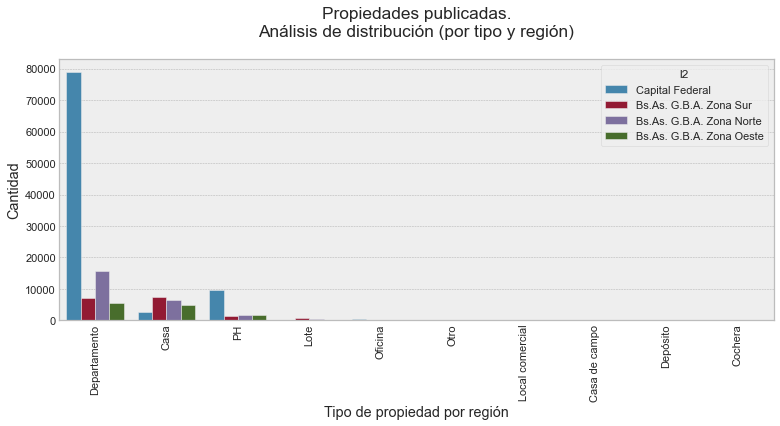

In [14]:
plt.figure(figsize = (6.4*2, 4.8)); sns.countplot(data = data, x = 'property_type', hue = 'l2', order = data['property_type'].value_counts().index)
plt.title('Propiedades publicadas.\nAnálisis de distribución (por tipo y región)\n')
plt.xticks(rotation = 90)
plt.xlabel("Tipo de propiedad por región")
plt.ylabel("Cantidad")
plt.savefig('Cantidad de propiedades (por tipo).png', dpi = 400)

In [15]:
mascara = data[(data['property_type'] == "Departamento") | (data['property_type'] == "Casa") | (data['property_type'] == "PH")]

Text(0, 0.5, 'Cantidad')

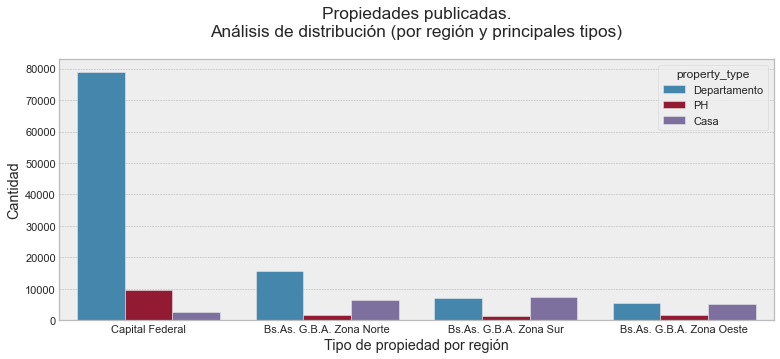

In [16]:
plt.figure(figsize = (6.4*2, 4.8)); ax = sns.countplot(data = mascara, x = 'l2', hue = 'property_type', order = mascara['l2'].value_counts().index)
plt.title('Propiedades publicadas.\nAnálisis de distribución (por región y principales tipos)\n')
plt.xticks()
plt.xlabel("Tipo de propiedad por región")
plt.ylabel("Cantidad")

In [17]:
data2 = data[(data['l2'] == "Capital Federal") & ((data['property_type'] == "Departamento")\
| (data['property_type'] == "Casa") | (data['property_type'] == "PH"))]

data2.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [18]:
data2.loc[data2['start_date'] == data2['end_date']].count()

start_date         1040
end_date           1040
created_on         1040
lat                 971
lon                 971
l1                 1040
l2                 1040
l3                 1040
rooms              1040
bedrooms           1040
bathrooms           994
surface_total       648
surface_covered     646
price              1040
currency           1040
title              1040
description        1040
property_type      1040
operation_type     1040
dtype: int64

In [19]:
data2 = data2[(data2['start_date'] != data2['end_date'])] 

In [20]:
data3 = data2.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2','l3','currency', 'title', 'description','operation_type'], axis=1)

In [21]:
data3.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,90445.000000,90445.000000,88320.000000,81920.000000,81604.000000,9.044500e+04
mean,2.964586,1.960418,1.559817,112.810510,95.112642,2.597681e+05
std,1.315872,1.072492,0.860666,984.562785,781.576737,3.230204e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.206000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


<Figure size 432x432 with 0 Axes>

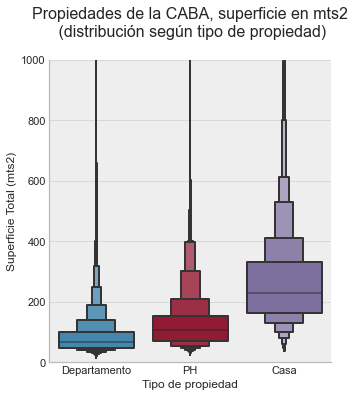

In [22]:
plt.figure(figsize = (6, 6))
sns.catplot(x='property_type', y="surface_total", kind="boxen", data=data3, showfliers = False); plt.ylim (0,1000)
plt.title ('Propiedades de la CABA, superficie en mts2\n (distribución según tipo de propiedad)\n', fontsize = 16)
plt.ylabel("Superficie Total (mts2)", fontsize = 12);plt.xlabel("Tipo de propiedad", fontsize = 12)
plt.show()

<Figure size 345.6x345.6 with 0 Axes>

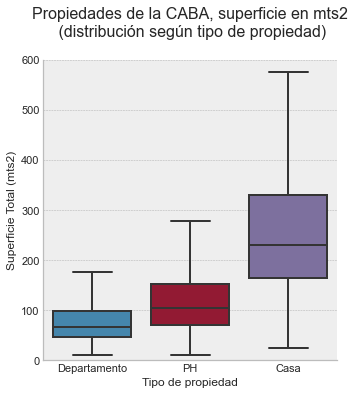

In [23]:
plt.figure(figsize = (4.8,4.8))
sns.catplot(x='property_type', y="surface_total", kind="box", data=data3, showfliers = False); plt.ylim (0,600)
plt.title ('Propiedades de la CABA, superficie en mts2\n (distribución según tipo de propiedad)\n', fontsize = 16)
plt.ylabel("Superficie Total (mts2)", fontsize = 12); plt.xlabel("Tipo de propiedad", fontsize = 12)
plt.show()

In [24]:
mascara2 = data3[(data3['surface_total']>= 15) & (data3['surface_total']<=600)]
mascara2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81600.000000,81600.000000,80723.00000,81600.000000,81090.000000,8.160000e+04
mean,2.999792,1.994902,1.54988,94.265674,84.277852,2.632842e+05
std,1.290399,1.037525,0.84358,72.951566,155.163640,3.245073e+05
min,1.000000,0.000000,1.00000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.00000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.00000,71.000000,63.000000,1.790000e+05
75%,4.000000,3.000000,2.00000,110.000000,96.000000,2.800000e+05
max,21.000000,15.000000,14.00000,600.000000,17220.000000,3.243423e+07


In [25]:
mascara2.loc[mascara2['surface_total']<mascara2['surface_covered']]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
446,5.0,4.0,3.0,230.0,244.0,490000.0,Casa
859,3.0,2.0,1.0,43.0,44.0,133000.0,Departamento
924,3.0,2.0,1.0,65.0,66.0,187000.0,Departamento
1329,2.0,1.0,2.0,44.0,45.0,235000.0,Departamento
1438,3.0,2.0,1.0,78.0,79.0,235000.0,Departamento
...,...,...,...,...,...,...,...
145138,1.0,1.0,1.0,24.0,25.0,54900.0,Departamento
145146,1.0,1.0,1.0,21.0,22.0,48000.0,Departamento
145262,3.0,2.0,1.0,51.0,52.0,127000.0,Departamento
145376,6.0,4.0,2.0,197.0,290.0,329900.0,Casa


In [26]:
mascara2.loc[mascara2['rooms']<mascara2['bedrooms']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01
mean,2.250000,4.100000,1.850000,126.250000,105.533333,2.334188e+05
std,1.409712,2.704046,0.971195,99.396932,72.574793,1.528601e+05
min,1.000000,2.000000,1.000000,38.000000,35.000000,7.300000e+04
25%,1.000000,2.000000,1.000000,57.750000,52.000000,1.485000e+05
50%,2.000000,3.000000,2.000000,94.000000,81.500000,1.885000e+05
75%,3.250000,5.000000,2.000000,140.000000,140.000000,2.900000e+05
max,5.000000,15.000000,5.000000,518.000000,400.000000,1.100000e+06


In [27]:
data4 = data3[(data3['surface_total']>= 15) & (data3['surface_total']<= 600) & (data3['surface_total']>=data3['surface_covered']) & (data3['rooms']>=data3['bedrooms']) & (data3['rooms']>=data3['bathrooms'])]
data4

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH


In [28]:
data4.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,78926.000000,78926.000000,78926.000000,78926.000000,78926.000000,7.892600e+04
mean,2.996326,1.988318,1.528444,93.479449,80.685478,2.569383e+05
std,1.278753,1.024905,0.793174,71.408619,57.866689,2.829764e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,70.000000,63.000000,1.790000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.800000e+05
max,21.000000,15.000000,9.000000,600.000000,600.000000,6.000000e+06


<Figure size 864x432 with 0 Axes>

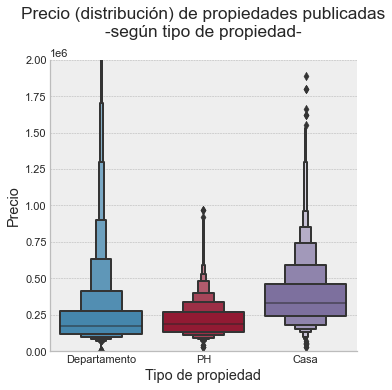

<Figure size 864x432 with 0 Axes>

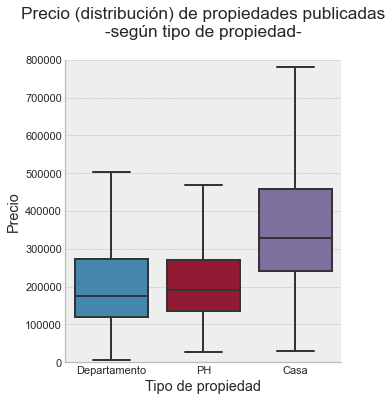

In [29]:
plt.figure(figsize = (6*2,6))
sns.catplot(x='property_type', y='price', kind="boxen", data=data4)
plt.ylim (0,2000000)
plt.title ('Precio (distribución) de propiedades publicadas\n-según tipo de propiedad-\n')
plt.ylabel("Precio")
plt.xlabel("Tipo de propiedad")
plt.show()

plt.figure(figsize = (6*2,6))
sns.catplot(x='property_type', y='price', kind="box", data=data4, showfliers = False)
plt.ylim (0,800000)
plt.title ('Precio (distribución) de propiedades publicadas\n-según tipo de propiedad-\n')
plt.ylabel("Precio")
plt.xlabel("Tipo de propiedad")
plt.show()

In [30]:
data5 = data4 [(data4['price']<= 800000)]
data5.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,76213.000000,76213.000000,76213.000000,76213.000000,76213.000000,76213.000000
mean,2.926902,1.943356,1.469749,87.148912,74.865089,216191.746487
std,1.210086,0.999675,0.720102,61.086003,46.904370,136687.000753
min,1.000000,0.000000,1.000000,15.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,123000.000000
50%,3.000000,2.000000,1.000000,70.000000,61.000000,175000.000000
75%,4.000000,3.000000,2.000000,103.000000,90.000000,265000.000000
max,21.000000,15.000000,9.000000,600.000000,552.000000,800000.000000


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

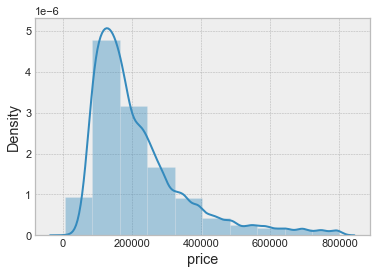

In [31]:
sns.distplot(data5['price'], bins = 10)

Text(0, 0.5, 'Cantidad de propiedades')

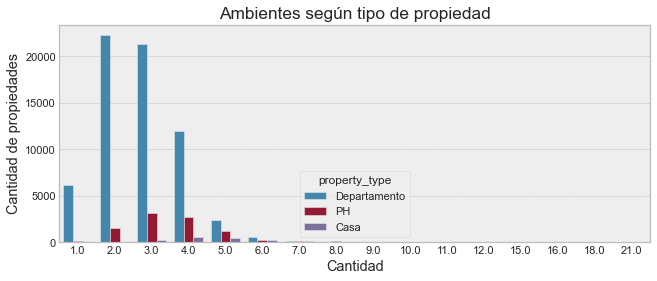

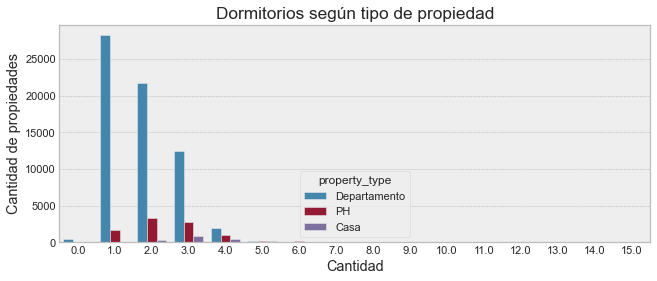

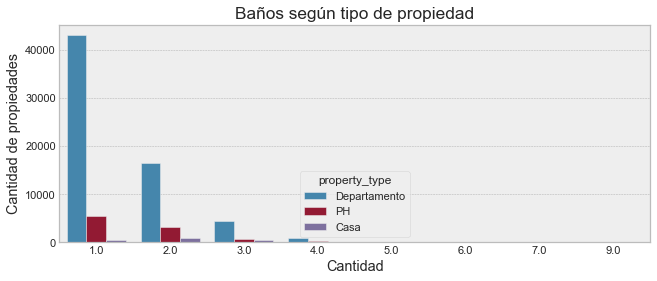

In [32]:
plt.figure(figsize = (12*3,4))

plt.subplot(1,3,1)
sns.countplot(data = data5, x = 'rooms', hue = 'property_type')
plt.title('Ambientes según tipo de propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Cantidad de propiedades')

plt.figure(figsize = (12*3,4))
plt.subplot(1,3,2)
sns.countplot(data = data5, x = 'bedrooms', hue = 'property_type')
plt.title('Dormitorios según tipo de propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Cantidad de propiedades')

plt.figure(figsize = (12*3,4))
plt.subplot(1,3,3)
sns.countplot(data = data5, x = 'bathrooms', hue = 'property_type')
plt.title('Baños según tipo de propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Cantidad de propiedades')

In [33]:
mascara3 = data5[(data5['rooms']<= 8) & (data5['bedrooms']<= 6) & (data5['bathrooms']<=5)]

Text(0.5, 1.0, 'Pairplot: relación entre variables del modelo')

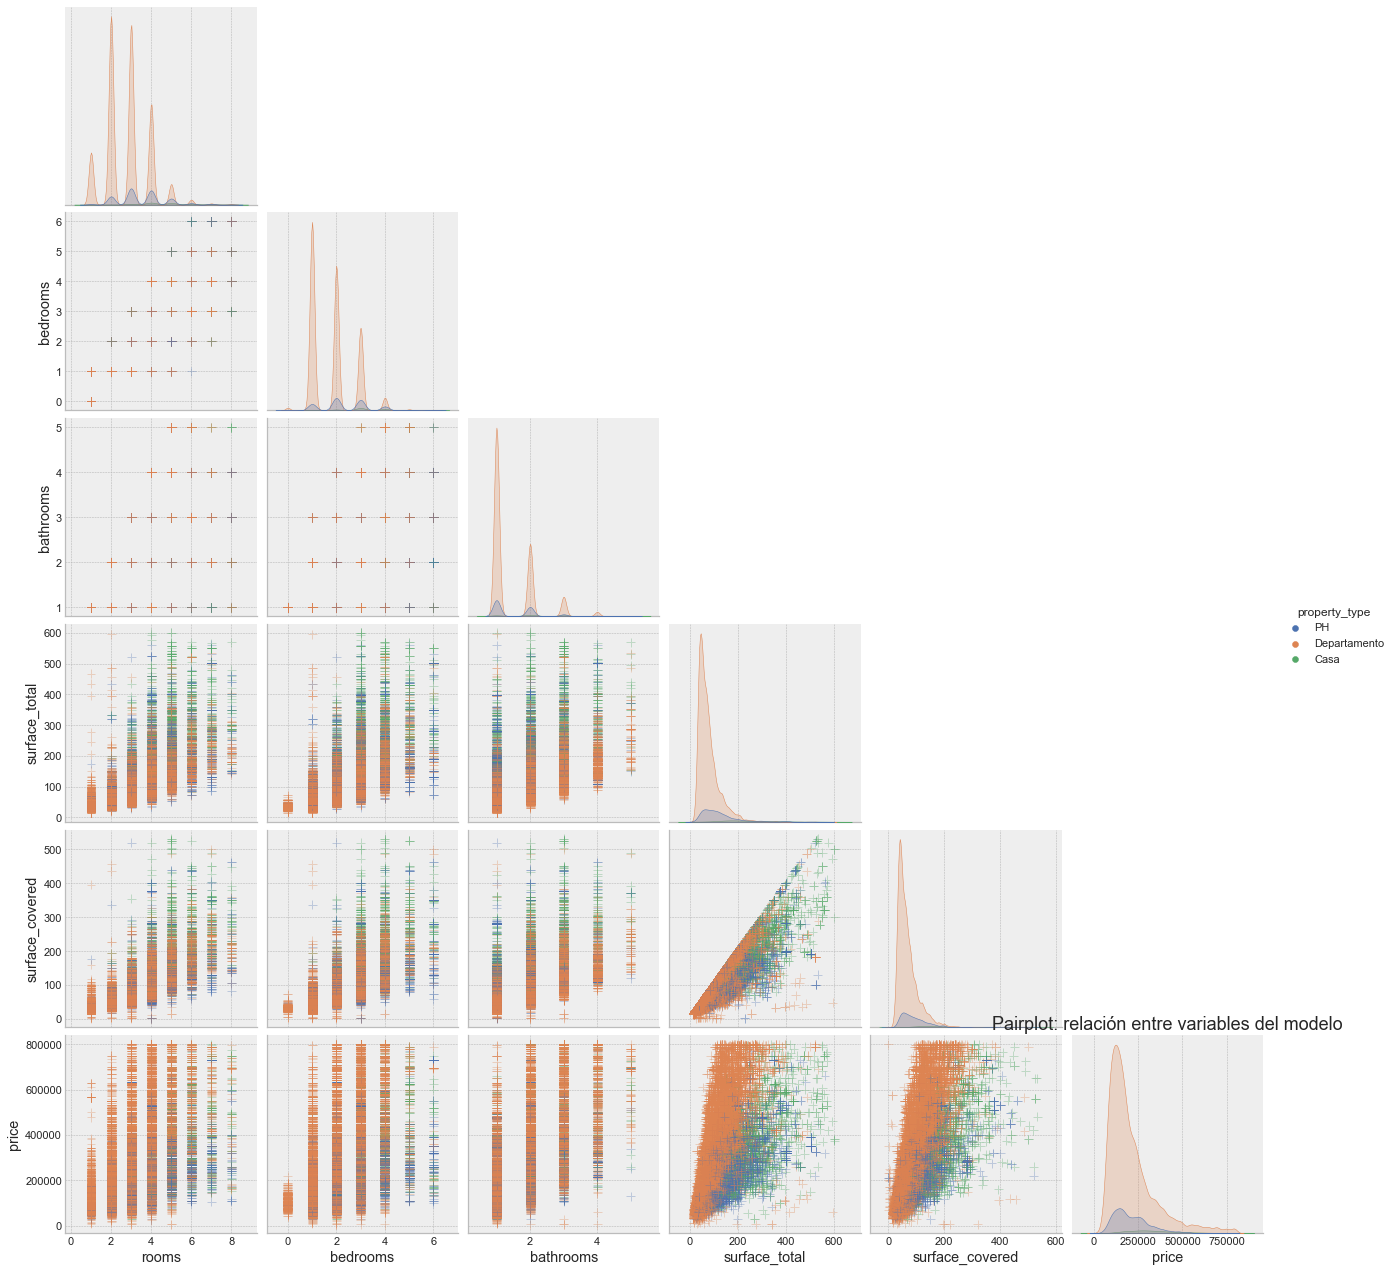

In [34]:
sns.pairplot(mascara3, hue = 'property_type', palette = 'deep', markers= '+', height = 3, corner=True, plot_kws=dict(s=80, linewidth=1, alpha=0.3))
plt.title('Pairplot: relación entre variables del modelo', fontsize = 18)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

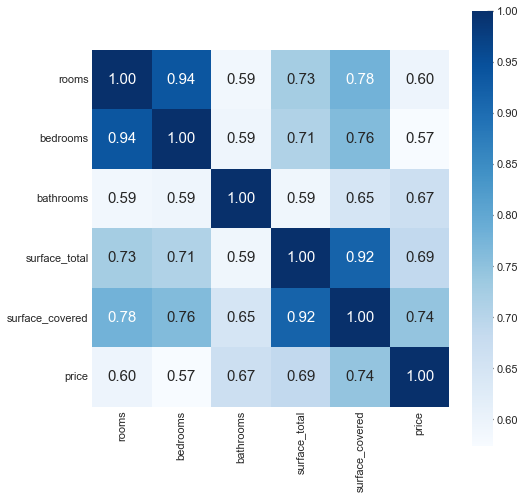

In [35]:
corr = mascara3.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= mascara3.drop(columns = 'property_type').columns, 
           yticklabels= mascara3.drop(columns = 'property_type').columns,
           cmap= 'Blues')
plt.show()

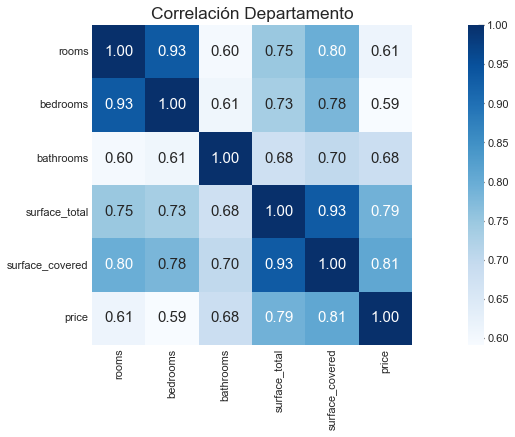

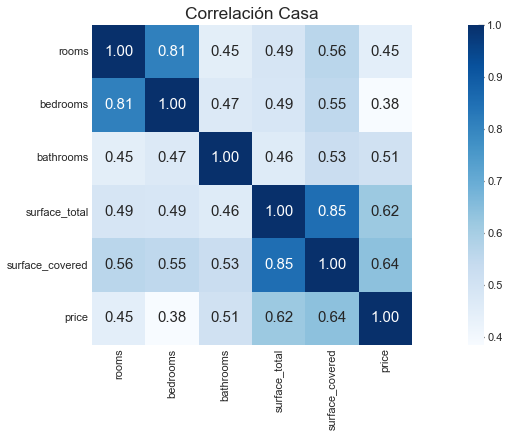

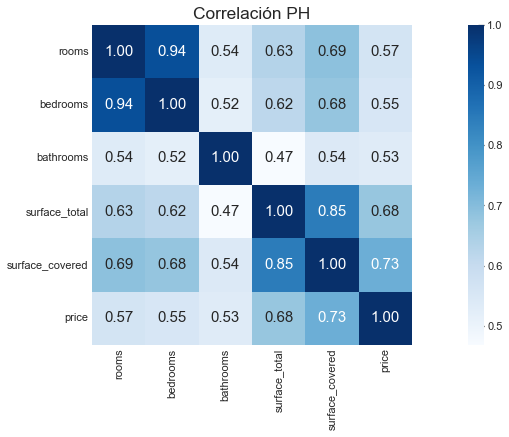

Wall time: 1.36 s


In [36]:
%%time
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.heatmap(mascara3[mascara3.property_type=='Departamento'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},  cmap= 'Blues')
plt.title("Correlación Departamento")
plt.show()


plt.figure(figsize=(20,20))
plt.subplot(3,1,2)
sns.heatmap(mascara3[mascara3.property_type=='Casa'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},  cmap= 'Blues')
plt.title("Correlación Casa")
plt.show()


plt.figure(figsize=(20,20))
plt.subplot(3,1,3)
sns.heatmap(mascara3[mascara3.property_type=='PH'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},  cmap= 'Blues')
plt.title("Correlación PH")
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [37]:
#### Voy a intentar dar respuesta a la siguiente pregunta: **¿Cuál es el precio promedio de las casas en Buenos Aires?**

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [38]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
mascara = np.logical_and(data.property_type.isin(['Departamento', 'Casa', 'PH']), data.l2 == 'Capital Federal')
data = data[mascara]
data = data[(data.surface_total <= 1000) & (data.surface_total >= 15) & (data.price <= 4000000)]
data = data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
data = data.dropna()
data

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


In [39]:
data.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


In [40]:
X = data.drop('price', axis=1).copy()
y = data[["price"]]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713, 1) (24306, 5) (24306, 1)


In [42]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [43]:
linear_model.fit(X_train, y_train)

LinearRegression()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


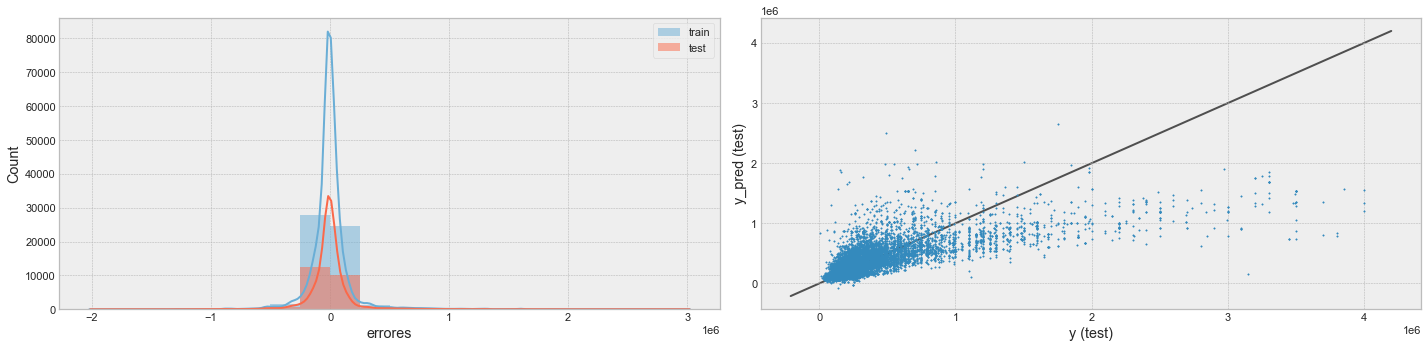

In [44]:
from sklearn.metrics import mean_squared_error
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelo[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', palette='Blues', kde=True, linewidth=0)
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', palette='Reds', kde=True, linewidth=0)
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

In [46]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 152950.67757423845


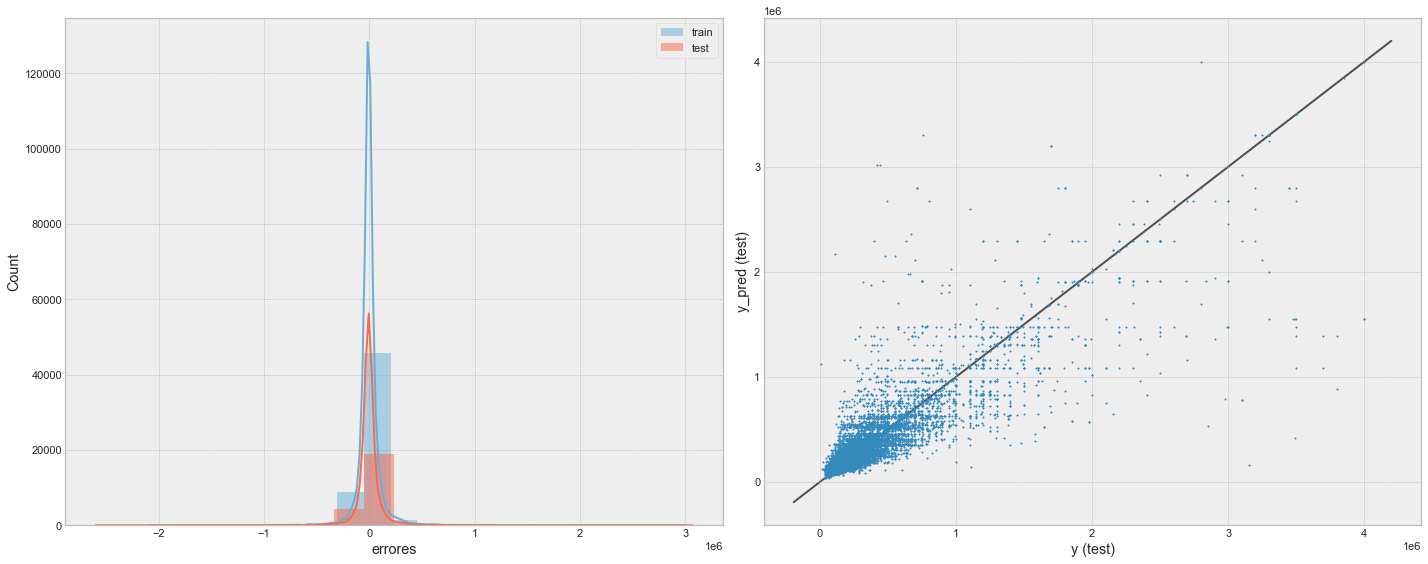

In [47]:
modelo = ['Árbol de Decisión']

for i, model in enumerate([tree_regressor]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelo[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,8))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', palette='Blues', kde=True, linewidth=0)
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', palette='Reds', kde=True, linewidth=0)
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [49]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


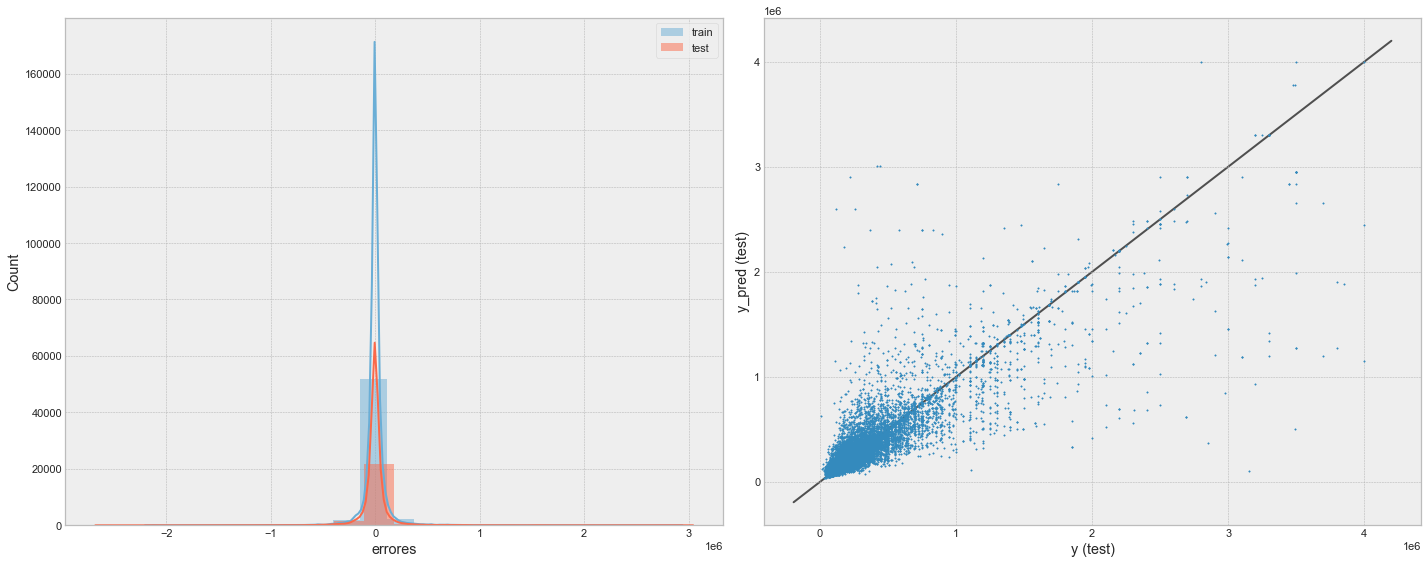

In [50]:
modelo = ['Vecinos más cercanos']

for i, model in enumerate([knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelo[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,8))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', palette='Blues', kde=True, linewidth=0)
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', palette='Reds', kde=True, linewidth=0)
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


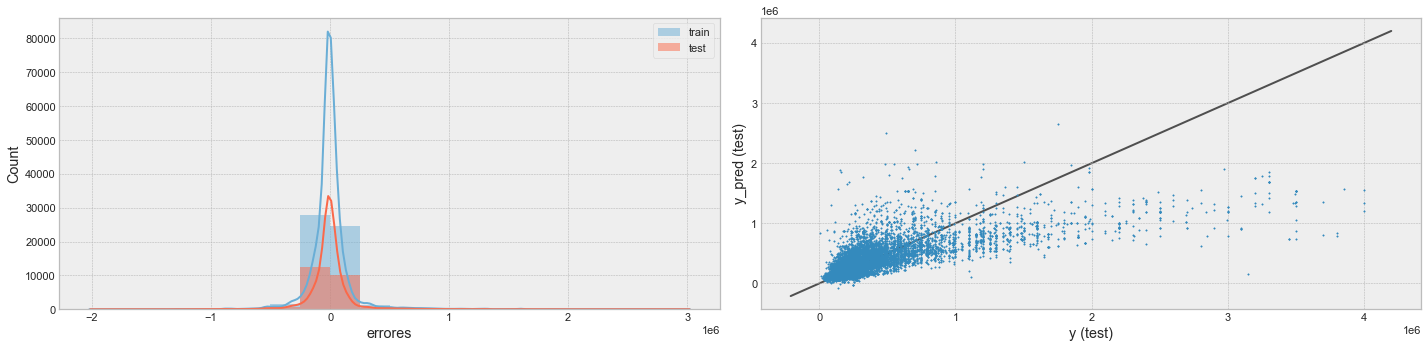

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 152950.67757423845


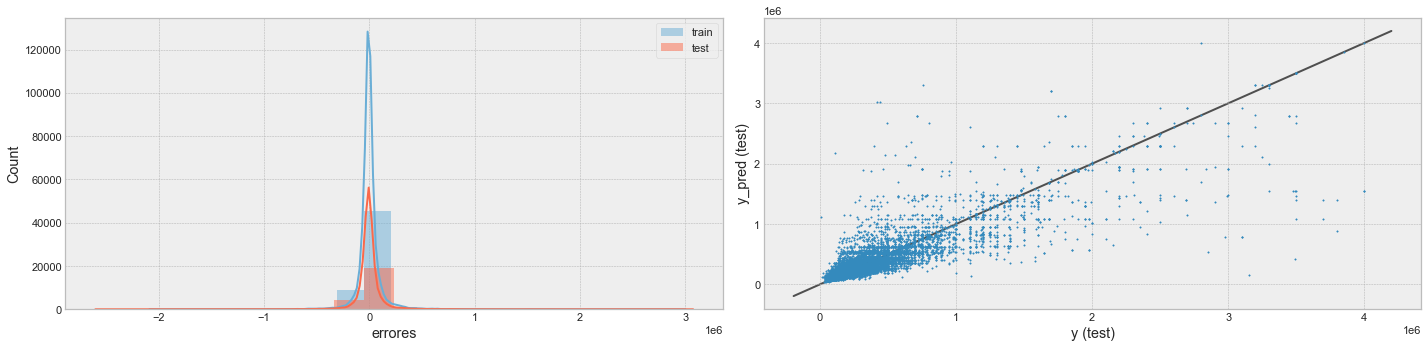

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


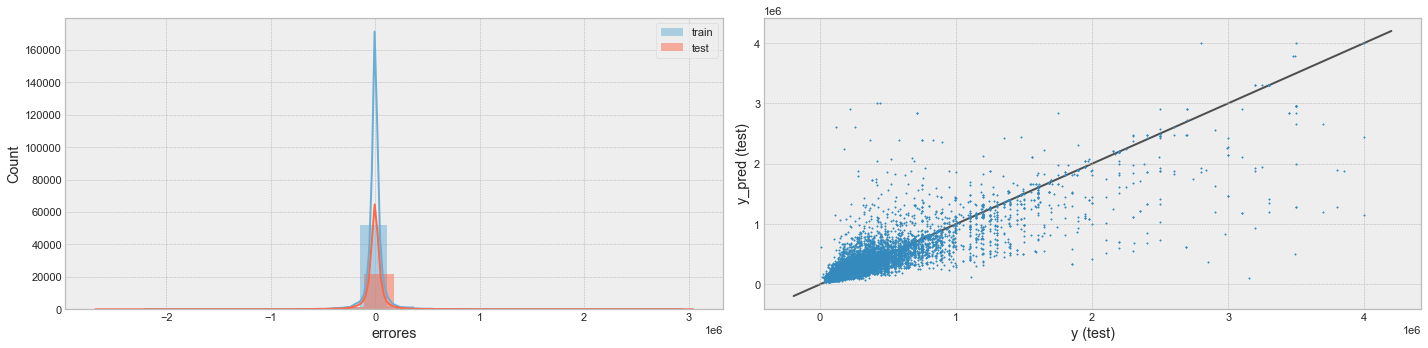

In [51]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', palette='Blues', kde=True, linewidth=0)
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', palette='Reds', kde=True, linewidth=0)
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Optimizacion de hiperparametros 

In [52]:
# Definimos las listas vacias para los valores deseados
lista_RMSE_train = []
lista_RMSE_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,25)

# Generamos un loop sobre los distintos valores de profundidad
for i in max_depths:
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = i, random_state = 42)
    
    # fiteamos el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_RMSE_train.append(RMSE_train)
    lista_RMSE_test.append(RMSE_test)
    

Text(0.5, 1.0, 'Curva de Validacion')

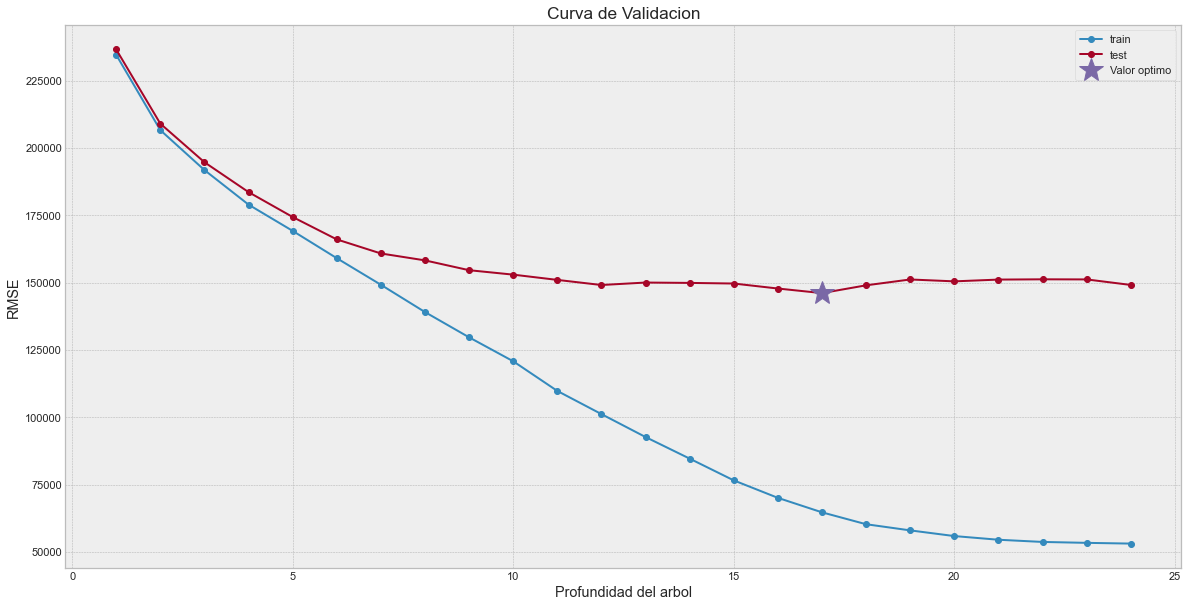

In [53]:
minimo = min(lista_RMSE_test)
i = lista_RMSE_test.index(minimo)

plt.figure(figsize = (20,10))
plt.plot(max_depths, lista_RMSE_train,'o-',label='train' )#ploteo train
plt.plot(max_depths, lista_RMSE_test,'o-',label='test') #ploteo pred
plt.plot(i+1, minimo, "*", markersize = 25, label = "Valor optimo") #ploteo valor optimo
plt.legend()
plt.xlabel("Profundidad del arbol")
plt.ylabel("RMSE")
plt.title("Curva de Validacion")

In [54]:
# Definimos las listas vacias para los valores deseados
lista_RMSE_train = []
lista_RMSE_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
k_vecinos = np.arange(1,25)

# Generamos un loop sobre los distintos valores de profundidad
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # fiteamos el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_RMSE_train.append(RMSE_train)
    lista_RMSE_test.append(RMSE_test)

Text(0.5, 1.0, 'Curva de Validacion')

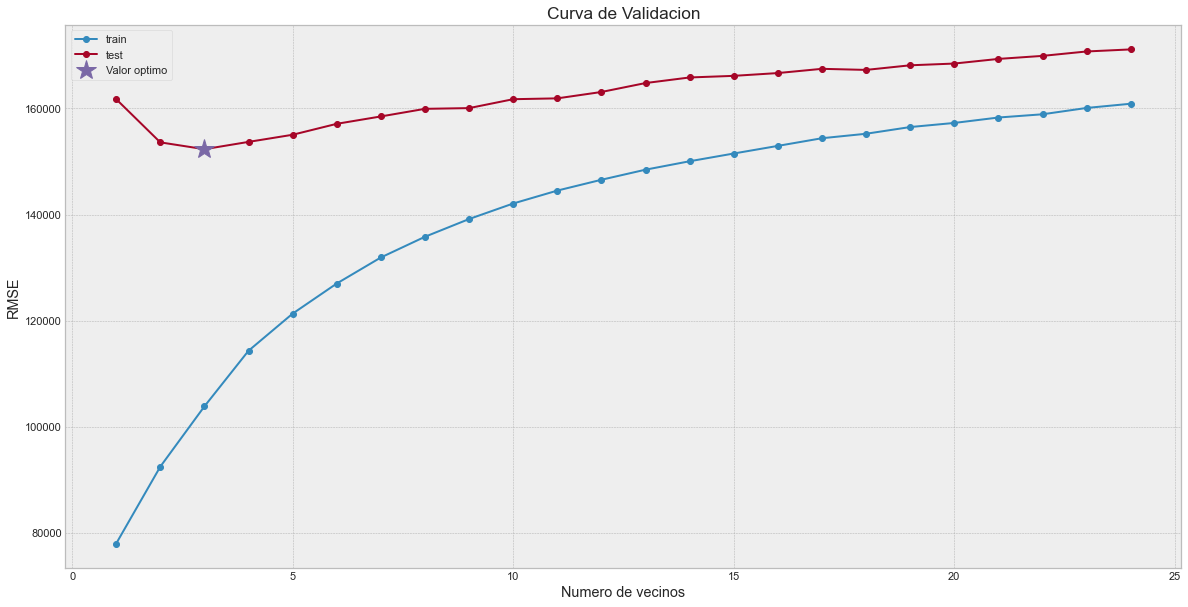

In [55]:
minimo = min(lista_RMSE_test)
i = lista_RMSE_test.index(minimo)

plt.figure(figsize = (20,10))
plt.plot(k_vecinos, lista_RMSE_train,'o-',label='train' ) #ploteo train
plt.plot(k_vecinos, lista_RMSE_test,'o-',label='test') #ploteo pred
plt.plot(i+1, minimo, "*", markersize = 20, label = "Valor optimo") #ploteo valor optimo
plt.legend() #habilito leyenda
plt.xlabel("Numero de vecinos")
plt.ylabel("RMSE")
plt.title("Curva de Validacion")

#### Volvemos a calcular RMSE para ambos modelos con su valor optimo

In [56]:
tree_regressor = DecisionTreeRegressor(max_depth=17, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [57]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 64721.0697732051
Raíz del error cuadrático medio en Test: 146092.75848556007


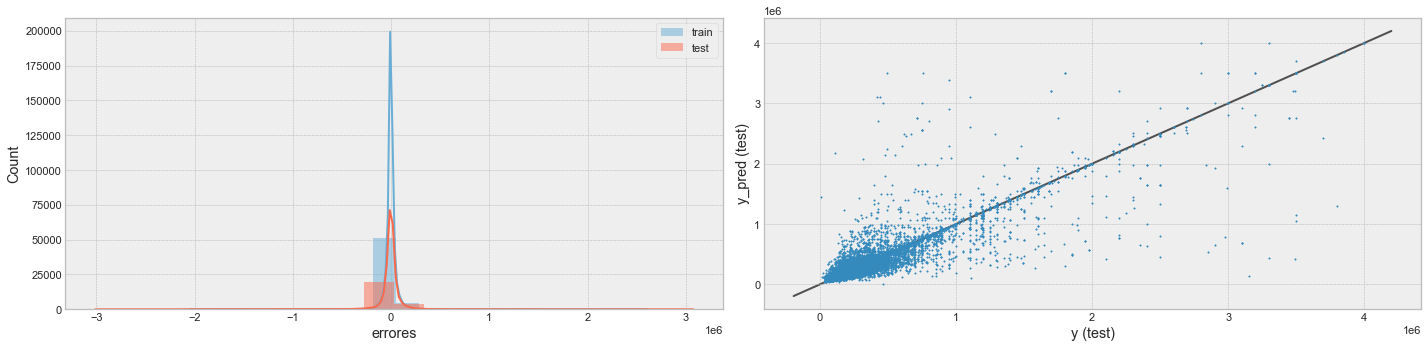

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


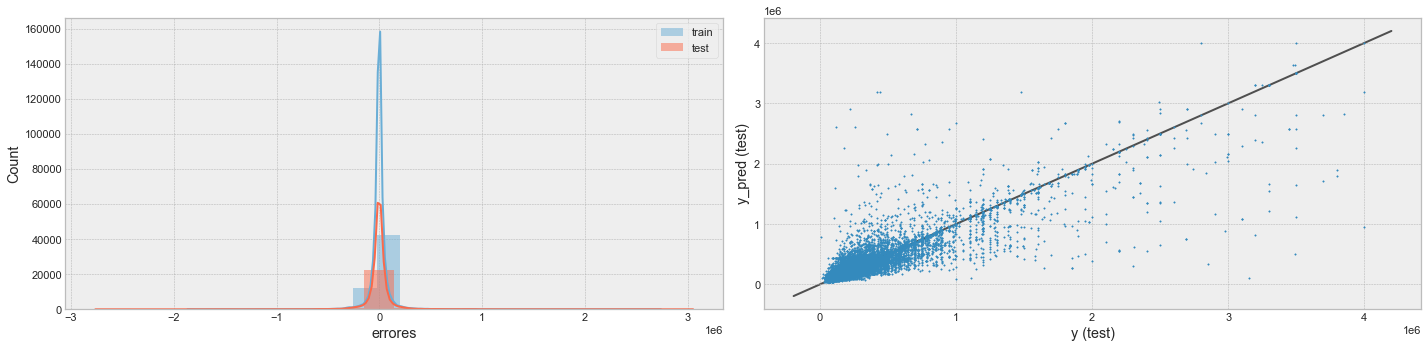

In [58]:
from sklearn.metrics import mean_squared_error
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(-1,1)
    y_test_pred = model.predict(X_test).reshape(-1,1)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', palette='Blues', kde=True, linewidth=0)
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', palette='Reds', kde=True, linewidth=0)
    plt.xlabel('errores')
    plt.legend()

    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()